In [3]:
from inclusion_tests import Arc,arc_arc,line_arc,line_line
import matplotlib.pyplot as plt
from matplotlib.patches import Arc as Arc_patch
import numpy as np
from matplotlib import collections  as mc



In [14]:
import time

In [4]:
from sympy.geometry import Segment

In [74]:


def draw(ax,r,theta1,theta2,x,y):
    ax.add_patch(Arc_patch((x, y), 2*r,2*r, theta1=theta1, theta2=theta2, linewidth=1, color='red'))

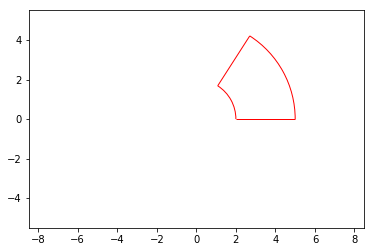

In [93]:
arc1 = Arc(2,0,1.0)
arc2 = Arc(5,0,1.0)
l1_x,l1_y = [arc1.endpoints[0][0],arc1.endpoints[0][1]],[arc2.endpoints[0][0],arc2.endpoints[0][1]]
l2_x,l2_y = [arc1.endpoints[1][0],arc1.endpoints[1][1]],[arc2.endpoints[1][0],arc2.endpoints[1][1]]
lc = mc.LineCollection([[l1_x,l1_y],[l2_x,l2_y]], colors = 'red', linewidths=1)
fig,ax = plt.subplots() 

ax.add_collection(lc)
draw(ax,arc1.r,np.rad2deg(arc1.theta1),np.rad2deg(arc1.theta2),0,0)


draw(ax,arc2.r,np.rad2deg(arc2.theta1),np.rad2deg(arc2.theta2),0,0)
#plt.grid()
plt.axis('equal')

plt.show()


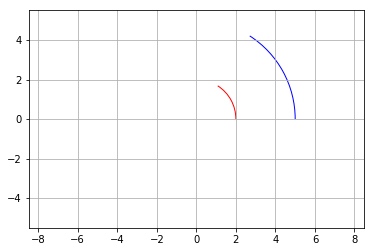

In [3]:
arc1 = Arc(2,0,1.0)
arc2 = Arc(5,0,1.0)
fig,ax = plt.subplots()
arc1.draw(ax,'red')
arc2.draw(ax,'blue')
plt.axis('equal')
plt.grid()
plt.show()

In [46]:
arc1.endpoints[1][0]

710913538012277/1000000000000000

In [10]:
%matplotlib inline

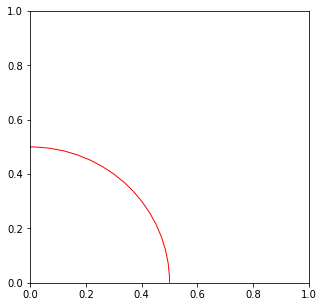

In [30]:

fig,ax = plt.subplots(figsize = (5,5)) 

#ax.invert_xaxis() # invert direction of x-axis since arc can only be drawn anti-clockwise
ax.add_patch(Arc_patch((0, 0), 1,1, theta1=0, theta2=90, linewidth=1, color='red')) # draw arc



In [5]:
class Interval:
    def __init__(self,r1,r2,theta1,theta2,origin=(0,0)):
        if r1>r2:
            r1,r2 = r2,r1
        
        if theta1>theta2:
            theta1,theta2 = thata2,theta1
            
        self.r1 = r1
        self.r2 = r2  
        self.theta1 = theta1
        self.theta2 = theta2
        x,y = origin
        self.x = x
        self.y = y
        self.gamma1 = Arc(r1,theta1,theta2,origin=origin)
        self.gamma2 = Arc(r2,theta1,theta2,origin=origin)
        self.l1 = Segment((x+r1*np.cos(theta1),y+r1*np.sin(theta1)),(x+r2*np.cos(theta1),y+r2*np.sin(theta1)))
        self.l2 = Segment((x+r1*np.cos(theta2),y+r1*np.sin(theta2)),(x+r2*np.cos(theta2),y+r2*np.sin(theta2)))
        self.l = [self.l1,self.l2]
        self.gamma = [self.gamma1,self.gamma2]
        
    def draw(self,ax,color):
        l11, l12 = tuple(self.l1.points[0]),tuple(self.l1.points[1])
        l21, l22 = tuple(self.l2.points[0]),tuple(self.l2.points[1])
        lc = mc.LineCollection([[l11,l12],[l21,l22]], colors = color, linewidths=1)
        self.gamma1.draw(ax,color)
        self.gamma2.draw(ax,color)
        ax.add_collection(lc)
        
        
        
        
        
    def bisect(self,i):
        if i == 0:
            L = Interval(self.r1, (self.r1+self.r2)/2, self.theta1, self.theta2)
            R = Interval((self.r1+self.r2)/2 ,self.r2, self.theta1, self.theta2)
        else:
            L = Interval(self.r1, self.r2, self.theta1, (self.theta1+self.theta2)/2)
            R = Interval(self.r1, self.r2, (self.theta1+self.theta2)/2, self.theta2) 
        return L,R

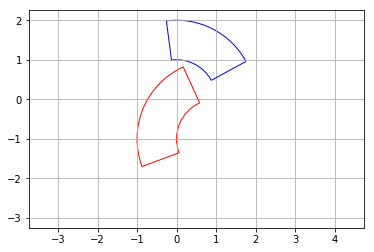

In [7]:
I2 = Interval(1,2,2,3.5,origin=(1,-1))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
fig,ax = plt.subplots()
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
plt.show()
######################################### counter-example for Lemma 3.4 (3) 

In [9]:
inclusion_test(I1,I2)

False

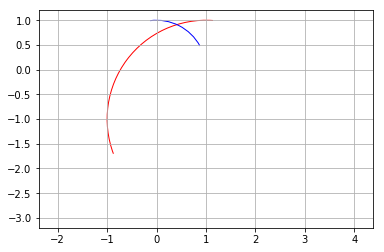

In [11]:
fig,ax = plt.subplots()
I2.gamma2.draw(ax,'red')
I1.gamma1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
plt.show()

In [69]:
print('I theta1 = ',I1.gamma1.theta1)
print('I theta2 = ',I1.gamma1.theta2)
print('Iprime theta1 = ',I2.gamma2.theta1)
print('Iprime theta2 = ',I2.gamma2.theta2)

I theta1 =  0.5
I theta2 =  1.7
Iprime theta1 =  2
Iprime theta2 =  3


In [62]:
inclusion_test(I1,I2)

gamma0 gamma1


In [14]:
i,j = 1,0
arc_arc(I1.gamma[i],I2.gamma[j])

False

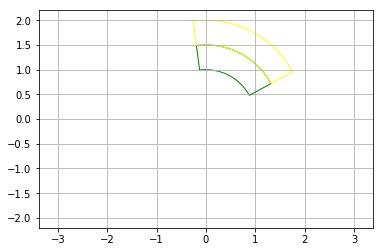

In [35]:
L,R = I1.bisect(0)
fig,ax = plt.subplots()
L.draw(ax,'green')
R.draw(ax,'yellow')
plt.axis('equal')
plt.grid()
plt.show()

In [9]:
s1 = Segment((0,0),(0,1))
tuple(s1.points[0])

(0, 0)

In [23]:
for i in range(1,-1,-1):
    print(i)

1
0


In [73]:
def inclusion_test(I,Iprime):
    for i in [1,0]:
        for j in [1,0]:
            if arc_arc(I.gamma[i],Iprime.gamma[j]):
                return True
            if line_arc(Iprime.l[i],I.gamma[j]):
                return True
            if line_arc(I.l[i],Iprime.gamma[j]):
                return True
            if line_line(I.l[i],Iprime.l[j]):
                return True
    return False

In [7]:
def interval_analysis(I,Iprime,Nr,Ntheta):
    if not inclusion_test(I,Iprime):
        J = None
    else:
        N = Nr
        n = 0
        for i in [0,1]:
            L,R = I.bisect(i)
            while n<N:
                LL,LR = L.bisect(i)
                RL,RR = R.bisect(i)
                if not inclusion_test(R,Iprime):
                    L = LL
                    R = LR
                elif not inclusion_test(L,Iprime):
                    L = RL
                    R = RR
                else:
                    if inclusion_test(LL,Iprime):
                        L = LL
                    else:
                        L = LR
                    if inclusion_test(RR,Iprime):
                        R = RR
                    else:
                        R = RL
                n += 1
            if i == 0:    
                Jr = [L.r1,R.r2]
            else:
                Jtheta = [L.theta1,R.theta2]
            N = Ntheta
            n = 0
        J = Interval(*Jr,*Jtheta)    
    return J
                        
        
    

computation time =  271.8458585739136


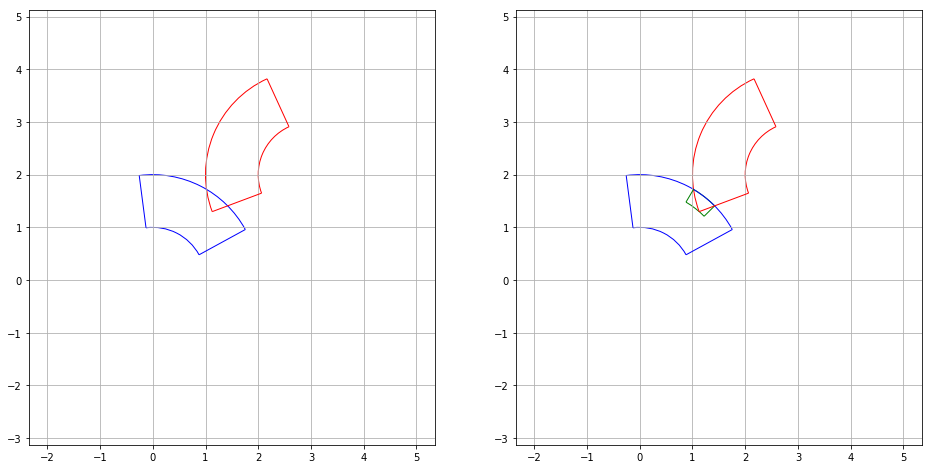

In [19]:
I2 = Interval(1,2,2,3.5,origin=(3,2))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
t0 = time.time()
J = interval_analysis(I1,I2,10,20)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()

computation time =  81.27421069145203


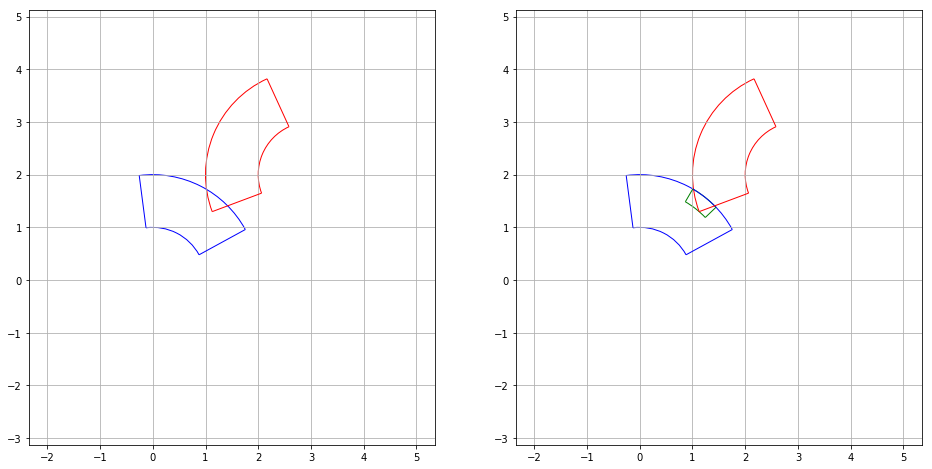

In [21]:
I2 = Interval(1,2,2,3.5,origin=(3,2))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
t0 = time.time()
J = interval_analysis(I1,I2,5,5)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()

In [33]:
TESTS = 0
def test_algo(I1,I2):
    t0 = time.time()
    J = interval_analysis(I1,I2,5,5)
    t1 = time.time()
    fig= plt.figure(figsize = (16,8))
    ax = fig.add_subplot(1,2,1)
    I2.draw(ax,'red')
    I1.draw(ax,'blue')
    plt.axis('equal')
    plt.grid()
    ax1 = fig.add_subplot(1,2,2)
    J.draw(ax1,'green')
    I2.draw(ax1,'red')
    I1.draw(ax1,'blue')
    plt.axis('equal')
    ax1.text(0.05, 0.95, f'computation time = {t1-t0} s', transform=ax1.transAxes, fontsize=14,
        verticalalignment='top')
    plt.grid()
    
    global TESTS
    TESTS += 1
    plt.savefig(f'test{TESTS}.png')
    plt.show()

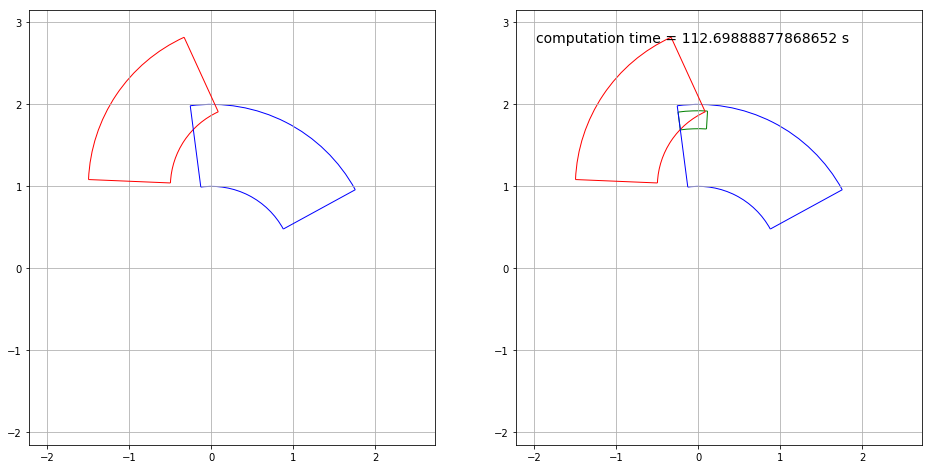

In [51]:
I2 = Interval(1,2,2,3.1,origin=(0.5,1))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
# fig= plt.figure(figsize = (16,8))
# ax = fig.add_subplot(1,2,1)
# I2.draw(ax,'red')
# I1.draw(ax,'blue')
# plt.axis('equal')

# plt.grid()
test_algo(I1,I2)


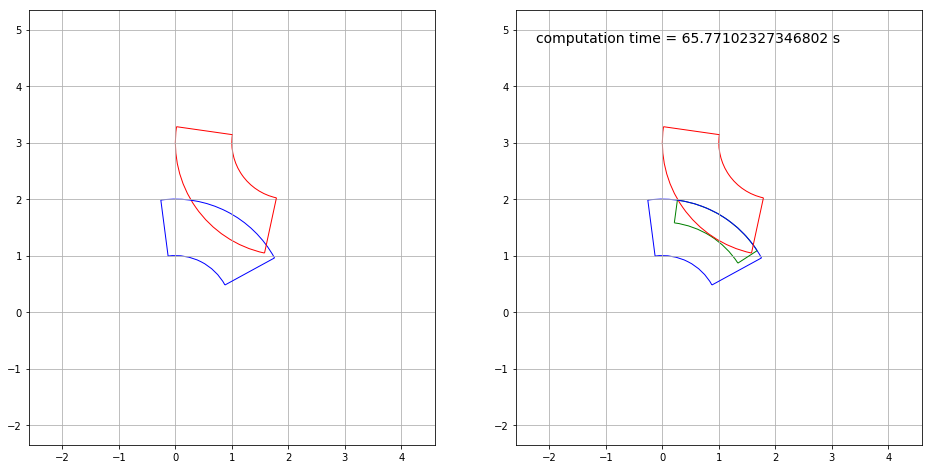

In [52]:
I2 = Interval(1,2,3,4.5,origin=(2,3))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
# fig= plt.figure(figsize = (16,8))
# ax = fig.add_subplot(1,2,1)
# I2.draw(ax,'red')
# I1.draw(ax,'blue')
# plt.axis('equal')

# plt.grid()
test_algo(I1,I2)

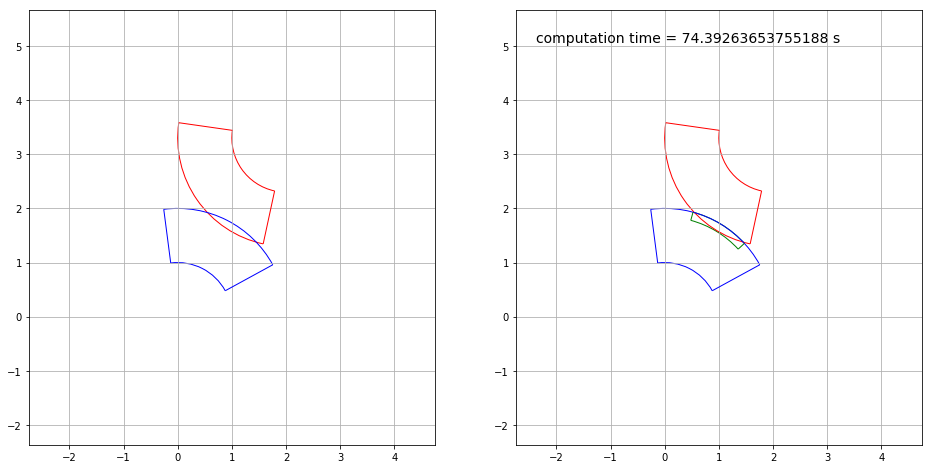

In [53]:
I2 = Interval(1,2,3,4.5,origin=(2,3.3))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
# fig= plt.figure(figsize = (16,8))
# ax = fig.add_subplot(1,2,1)
# I2.draw(ax,'red')
# I1.draw(ax,'blue')
# plt.axis('equal')

# plt.grid()
test_algo(I1,I2)

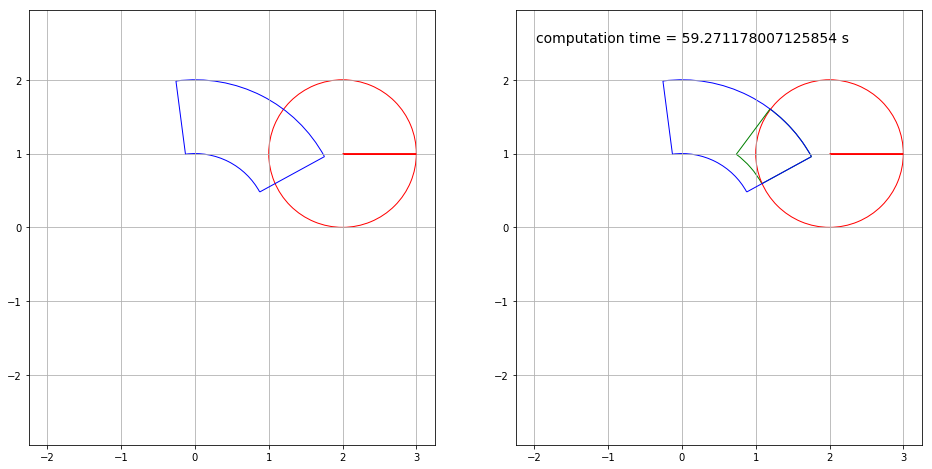

In [54]:
I2 = Interval(1,0.0+1e-6,0+1e-6,6.2831,origin=(2,1))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
# fig= plt.figure(figsize = (16,8))
# ax = fig.add_subplot(1,2,1)
# I2.draw(ax,'red')
# I1.draw(ax,'blue')
# plt.axis('equal')

# plt.grid()
test_algo(I1,I2)

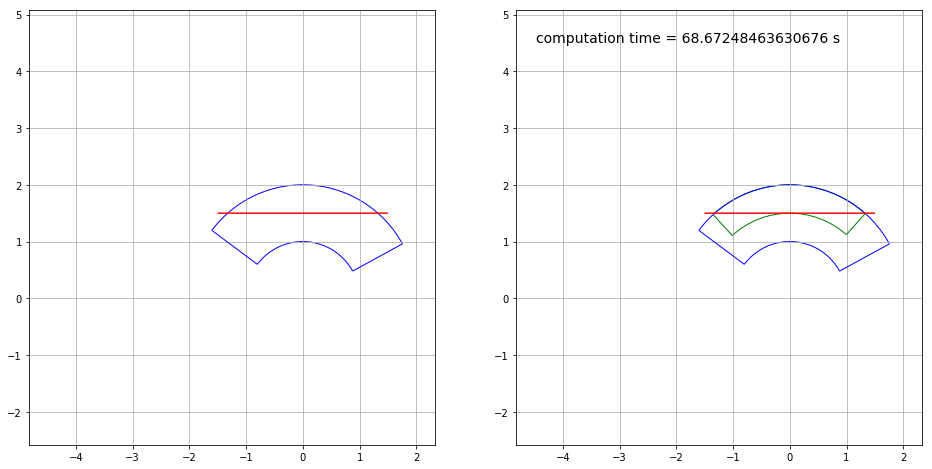

In [71]:
I2 = Interval(3,0.0+1e-6,1e-6,1e-6,origin=(-1.5,1.5))
I1 = Interval(1,2,0.5,2.5,origin=(0,0))
# fig= plt.figure(figsize = (16,8))
# ax = fig.add_subplot(1,2,1)
# I2.draw(ax,'red')
# I1.draw(ax,'blue')
# plt.axis('equal')

# plt.grid()
test_algo(I1,I2)

True

AttributeError: 'NoneType' object has no attribute 'draw'

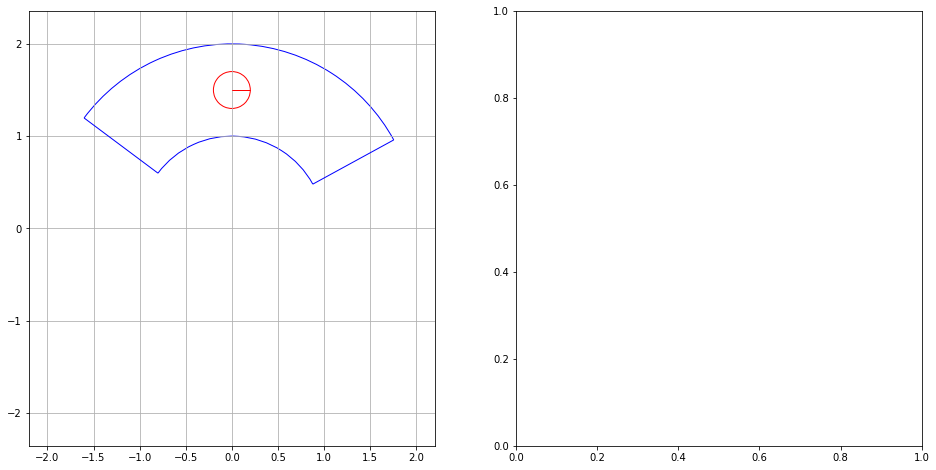

In [56]:
I2 = Interval(0.2,+1e-6,1e-6,2*np.pi,origin=(0,1.5))
I1 = Interval(1,2,0.5,2.5,origin=(0,0))
# fig= plt.figure(figsize = (16,8))
# ax = fig.add_subplot(1,2,1)
# I2.draw(ax,'red')
# I1.draw(ax,'blue')
# plt.axis('equal')

# plt.grid()
test_algo(I1,I2)

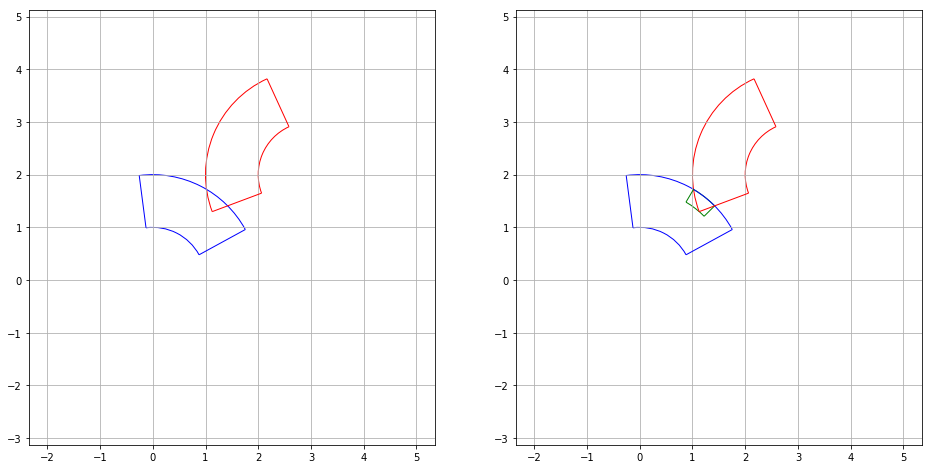

In [18]:
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()

In [7]:
inclusion_test(I1,I2)

True

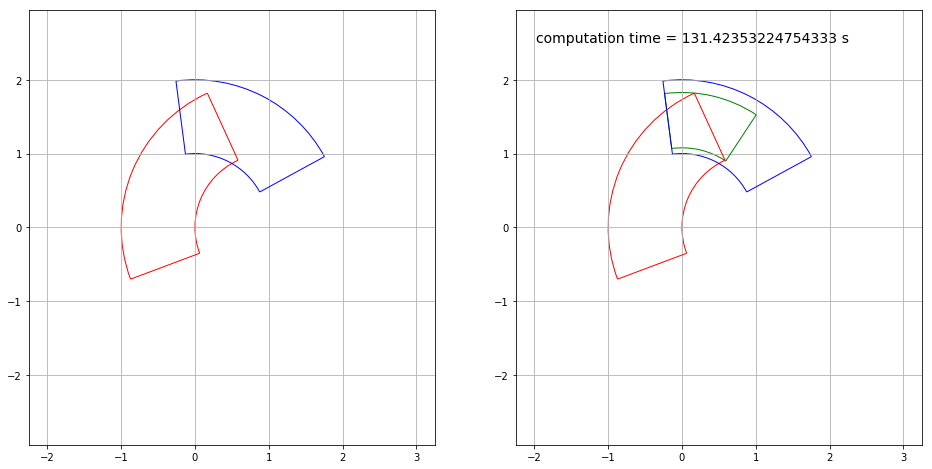

In [75]:
I2 = Interval(1,2,2,3.5,origin=(1,0))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
test_algo(I1,I2)

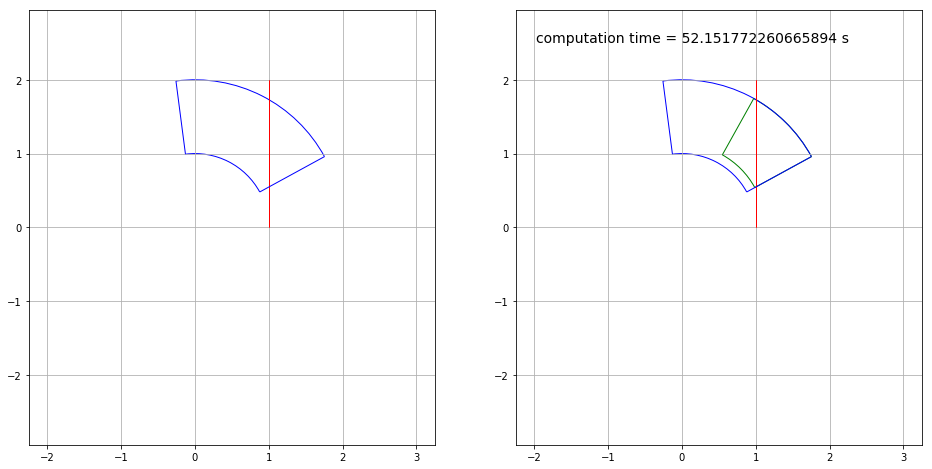

In [78]:
I2 = Interval(1e-6,2,np.pi/2,np.pi/2,origin=(1,0))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
# fig= plt.figure(figsize = (16,8))
# ax = fig.add_subplot(1,2,1)
# I2.draw(ax,'red')
# I1.draw(ax,'blue')
# plt.axis('equal')

# plt.grid()
test_algo(I1,I2)

In [85]:
class Interval:
    def __init__(self,r1,r2,theta1,theta2,origin=(0,0)):
        
        if r1>r2:
            r1,r2 = r2,r1
        
        if theta1>theta2:
            theta1,theta2 = thata2,theta1
            
        not_zero = lambda x: x if x != 0.0 else 1e-6    
        r1,r2,theta1,theta2 =  list(map(not_zero,[r1,r2,theta1,theta2]))  
        
        self.r1 = r1
        self.r2 = r2  
        self.theta1 = theta1
        self.theta2 = theta2
        x,y = origin
        self.x = x
        self.y = y
        self.gamma1 = Arc(r1,theta1,theta2,origin=origin)
        self.gamma2 = Arc(r2,theta1,theta2,origin=origin)
        self.l1 = Segment((x+r1*np.cos(theta1),y+r1*np.sin(theta1)),(x+r2*np.cos(theta1),y+r2*np.sin(theta1)))
        self.l2 = Segment((x+r1*np.cos(theta2),y+r1*np.sin(theta2)),(x+r2*np.cos(theta2),y+r2*np.sin(theta2)))
        self.l = [self.l1,self.l2]
        self.gamma = [self.gamma1,self.gamma2]
        
    def draw(self,ax,color):
        l11, l12 = tuple(self.l1.points[0]),tuple(self.l1.points[1])
        l21, l22 = tuple(self.l2.points[0]),tuple(self.l2.points[1])
        lc = mc.LineCollection([[l11,l12],[l21,l22]], colors = color, linewidths=1)
        self.gamma1.draw(ax,color)
        self.gamma2.draw(ax,color)
        ax.add_collection(lc)   
        
    def bisect(self,i):
        if i == 0:
            L = Interval(self.r1, (self.r1+self.r2)/2, self.theta1, self.theta2)
            R = Interval((self.r1+self.r2)/2 ,self.r2, self.theta1, self.theta2)
        else:
            L = Interval(self.r1, self.r2, self.theta1, (self.theta1+self.theta2)/2)
            R = Interval(self.r1, self.r2, (self.theta1+self.theta2)/2, self.theta2) 
        return L,R
    
    def inclusion_test(self,Iprime):
        for i in [1,0]:
            for j in [1,0]:
                if arc_arc(self.gamma[i],Iprime.gamma[j]):
                    return True
                if line_arc(Iprime.l[i],self.gamma[j]):
                    return True
                if line_arc(self.l[i],Iprime.gamma[j]):
                    return True
                if line_line(self.l[i],Iprime.l[j]):
                    return True
        return False
    
    def interval_analysis(self,Iprime,Nr,Ntheta):
        if not self.inclusion_test(Iprime):
            J = Interval(0,0,0,0)
        else:
            N = Nr
            n = 0
            for i in [0,1]:
                L,R = self.bisect(i)
                while n<N:
                    LL,LR = L.bisect(i)
                    RL,RR = R.bisect(i)
                    if not R.inclusion_test(Iprime):
                        L = LL
                        R = LR
                    elif not L.inclusion_test(Iprime):
                        L = RL
                        R = RR
                    else:
                        if LL.inclusion_test(Iprime):
                            L = LL
                        else:
                            L = LR
                        if RR.inclusion_test(Iprime):
                            R = RR
                        else:
                            R = RL
                    n += 1
                if i == 0:    
                    Jr = [L.r1,R.r2]
                else:
                    Jtheta = [L.theta1,R.theta2]
                N = Ntheta
                n = 0
            J = Interval(*Jr,*Jtheta)    
        return J